True positive == Actual True ++ Predicted True

True Negative == Actual False ++ Predicted False

False Positive == Actual False ++ Predicted True

False Negative == Actual True ++ Predicted False

In [1]:
from google.colab import files
data=files.upload()

Saving heart.csv to heart.csv


In [2]:
import pandas as pd

df=pd.read_csv("heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]


In [3]:
from sklearn.model_selection import train_test_split

age=df["age"]
heart_attack=df["target"]

age_train,age_test,heart_attack_train,heart_attack_test=train_test_split(age,heart_attack,test_size=0.25,random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np

X=np.reshape(age_train.ravel(),(len(age_train),1))
Y=np.reshape(heart_attack_train.ravel(),(len(heart_attack_train),1))

classifier=LogisticRegression(random_state=0)
classifier.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [7]:
x_test=np.reshape(age_test.ravel(),(len(age_test),1))
y_test=np.reshape(heart_attack_test.ravel(),(len(heart_attack_test),1))

heart_attack_pred=classifier.predict(x_test)

predicted_values=[]

for i in heart_attack_pred:
  if i==0:
    predicted_values.append('No')
  else:
    predicted_values.append('Yes')

actual_values=[]

for i in y_test.ravel():
  if i==0:
    actual_values.append('No')
  else:
    actual_values.append('Yes')

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

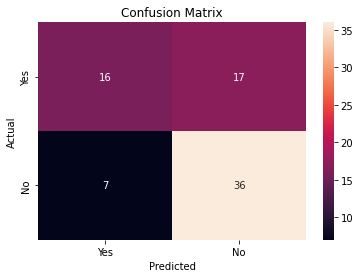

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels=['Yes','No']

cm=confusion_matrix(actual_values,predicted_values)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [9]:
accuracy=(16+36)/(36+16+17+7)

print(accuracy)

0.6842105263157895


In [10]:
factors=df[["age","sex","cp","chol","thalach"]]
heart_attack=df["target"]

factors_train,factors_test,heart_attack_train,heart_attack_test=train_test_split(factors,heart_attack,test_size=0.25,random_state=0)

In [12]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

factors_train=sc.fit_transform(factors_train)
factors_test=sc.fit_transform(factors_test)

classifier2=LogisticRegression(random_state=0)
classifier2.fit(factors_train,heart_attack_train)

LogisticRegression(random_state=0)

In [17]:
heart_attack_pred1=classifier2.predict(factors_test)

predicted_values1=[]

for i in heart_attack_pred1:
  if i==0:
    predicted_values1.append('No')
  else:
    predicted_values1.append('Yes')

actual_values1=[]

for i in heart_attack_test.ravel():
  if i==0:
    actual_values1.append('No')
  else:
    actual_values1.append('Yes')

[Text(0, 0.5, 'Yes'), Text(0, 1.5, 'No')]

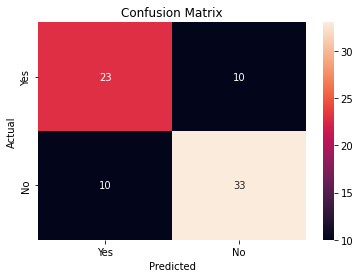

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels=['Yes','No']

cm=confusion_matrix(actual_values1,predicted_values1)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)